### Decision Tree

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


df = pd.read_csv('/Users/veg/Desktop/QTM347/df_final.csv')

X = df.drop('RPY_3YR_RT', axis=1)
y = df['RPY_3YR_RT'] 

cv = KFold(n_splits=10, random_state=42, shuffle=True)

mse_scores = []
r2_scores = []

# use cross-validation to find max_depth from 1 to 10
for depth in range(1, 11):
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    
    neg_mse = cross_val_score(tree_model, X, y, scoring='neg_mean_squared_error', cv=cv)
    mse_scores.append(-neg_mse.mean()) 
    
    r2 = cross_val_score(tree_model, X, y, scoring='r2', cv=cv)
    r2_scores.append(r2.mean())

opt_depth_mse = np.argmin(mse_scores) + 1 
opt_depth_r2 = np.argmax(r2_scores) + 1 

print(f"Optimal max depth by MSE: {opt_depth_mse}, with MSE: {min(mse_scores)}")
print(f"Optimal max depth by R^2: {opt_depth_r2}, with R^2: {max(r2_scores)}")

#both R2 and MSE give the same optimal max_depth, eithor is fine
opt_depth_max = opt_depth_r2

# fit model with 7 max_depth
final_tree_model = DecisionTreeRegressor(max_depth=opt_depth_max, random_state=42)
final_tree_model.fit(X, y) 

y_pred = final_tree_model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"With the optimal max_depth {opt_depth_max}, MSE of the prediction is {mse}, and R^2 is {r2}")

#Result:
#Optimal max depth by MSE: 7, with MSE: 0.006692727486178438
#Optimal max depth by R^2: 7, with R^2: 0.7645483155084006
#With the optimal max_depth 7, MSE of the prediction is 0.004899117531748272, and R^2 is 0.8292083319661899

Optimal max depth by MSE: 7, with MSE: 0.006692727486178438
Optimal max depth by R^2: 7, with R^2: 0.7645483155084006
With the optimal max_depth 7, MSE of the prediction is 0.004899117531748272, and R^2 is 0.8292083319661899


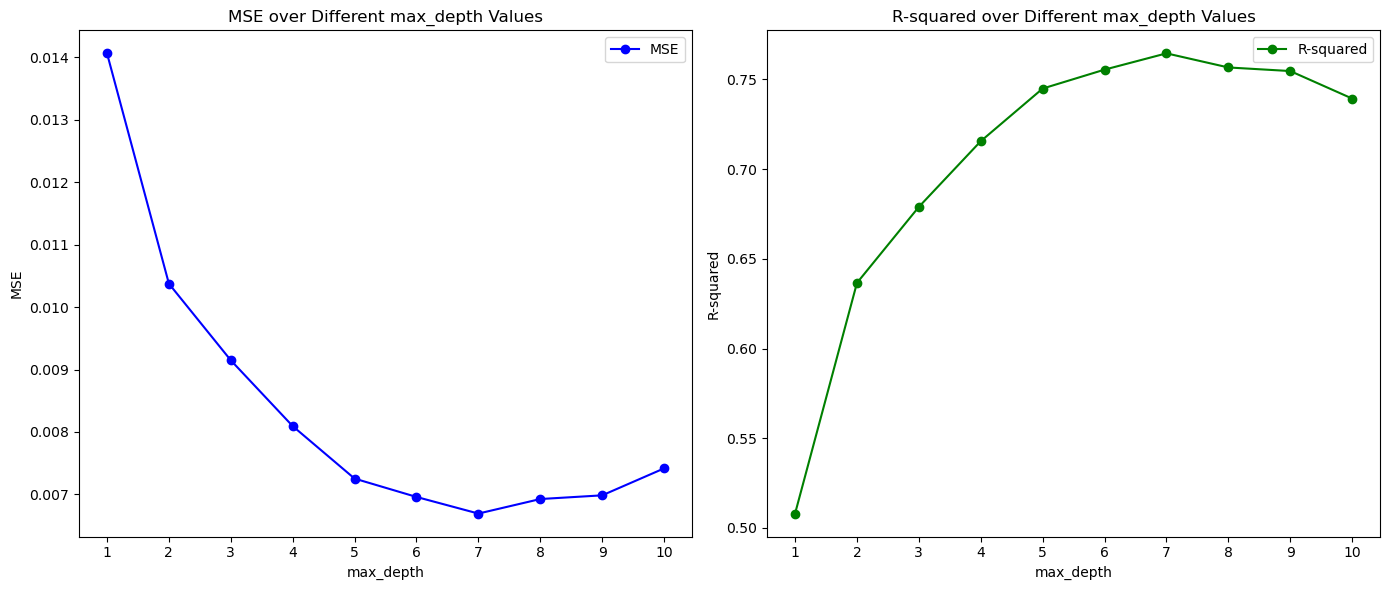

In [7]:
#plots
depth_range = range(1, 11)
plt.figure(figsize=(14, 6))

# MSE
plt.subplot(1, 2, 1)
plt.plot(depth_range, mse_scores, marker='o', linestyle='-', color='blue', label='MSE')
plt.title('MSE over Different max_depth Values')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(depth_range)
plt.legend()

# R-squared
plt.subplot(1, 2, 2)
plt.plot(depth_range, r2_scores, marker='o', linestyle='-', color='green', label='R-squared')
plt.title('R-squared over Different max_depth Values')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.xticks(depth_range)
plt.legend()

plt.tight_layout()
plt.show()